In [ ]:
import numpy as np

# Import  CIFAR-10 dataset
from tensorflow.keras.datasets import cifar10
from sklearn.utils import shuffle

# Import PyPlot to visualize images
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle



# Load dataset
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
# Print the shapes of training and testing set
print("X_train.Shape =", X_train.shape, "Y_train.Shape =", Y_train.shape)
print("X_test.Shape =", X_test.shape, "Y_test.Shape =", Y_test.shape)

X_train.Shape = (50000, 32, 32, 3) Y_train.Shape = (50000, 1)
X_test.Shape = (10000, 32, 32, 3) Y_test.Shape = (10000, 1)


In [ ]:
#Output:
X_train.shape = (50000, 32, 32, 3)
Y_train.shape = (50000, 1)
X_test.shape = (10000, 32, 32, 3) 
Y_test.shape = (10000, 1)


In [ ]:
NUM_CLASSES = 10
CIFAR10_CLASSES = ["Airplane", "Automobile", "Bird", "Cat", "Deer", 
                   "Dog", "Frog", "Horse", "Ship", "Truck"]

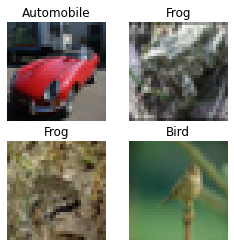

In [ ]:
# Show Random Images from training set
cols = 2 # No. of columns
rows = 2 # No. of rows
fig = plt.figure(figsize=(2 * cols, 2 * rows))
# Add subplot for each random image
for col in range(columns):
    for row in range(rows):
        random_index = np.random.randint(0, len(Y_train)) # Pick a random index for sampling the image
        ax = fig.add_subplot(rows, columns, col * rows + row + 1) # Add a sub-plot at (rows, column)
        ax.grid(b=False) # Get rid of grids
        ax.axis("off") # Get rid of axis
        ax.imshow(X_train[random_index, :]) # Show random image
        ax.set_title(CIFAR10_CLASSES[Y_train[random_index][0]]) # Set title of sub-plot
plt.show() # Show the image

In [ ]:
import tensorflow as tf
import numpy as np
print("TensorFlow's version is", tf.__version__)
print("Keras' version is", tf.keras.__version__)

TensorFlow's version is 2.4.1
Keras' version is 2.4.0


In [ ]:
# Normalize training and testing pixel values
X_train_normalized = X_train / 255 - 0.5
X_test_normalized = X_test / 255 - 0.5

In [ ]:
# Convert class vectors to binary class matrices.
Y_train_coded = tf.keras.utils.to_categorical(Y_train, NUM_CLASSES)
Y_test_coded = tf.keras.utils.to_categorical(Y_test, NUM_CLASSES)

In [ ]:
# import necessary building blocks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU

def make_model():
    """
    Define your model architecture here.
    Returns `Sequential` model.
    """
    
    model = Sequential()
    
    model.add(Conv2D(filters=16, kernel_size=(3, 3), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPooling2D())
    
    model.add(Dropout(rate=0.25))
    
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same'))
    model.add(LeakyReLU(0.1))
    
    model.add(MaxPooling2D())
    
    model.add(Dropout(rate=0.25))
    
    model.add(Flatten())
    
    model.add(Dense(units=256))
    model.add(LeakyReLU(0.1))
    
    model.add(Dropout(rate=0.5))
    
    model.add(Dense(units=10))
    model.add(Activation("softmax"))
    
    return model

In [ ]:
# describe model
s = tf.keras.backend.clear_session()
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9

In [ ]:
INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 64
EPOCHS = 10

s = tf.keras.backend.clear_session()  # clear default graph
# don't call K.set_learning_phase() !!! (otherwise will enable dropout in train/test simultaneously)
model = make_model()  # define our model

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=tf.keras.optimizers.Adamax(lr=INIT_LR), 
    metrics=['accuracy']  # Accuracy in training
)

In [ ]:
# scheduler of learning rate (decay with epochs)
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

In [ ]:
# callback for printing of actual learning rate used by optimizer
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", tf.keras.backend.get_value(model.optimizer.lr))

In [ ]:
# fit model
history = model.fit(
    X_train_normalized, Y_train_coded,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[tf.keras.callbacks.LearningRateScheduler(lr_scheduler), 
               LrHistory()],
    validation_data=(X_test_normalized, Y_test_coded),
    shuffle=True,
    verbose=1,
    initial_epoch=0
)

Epoch 1/10
Learning rate: 0.005
782/782 [==============================] - 42s 15ms/step - loss: 1.6414 - accuracy: 0.4035 - val_loss: 0.9852 - val_accuracy: 0.6463
Epoch 2/10
Learning rate: 0.0045
782/782 [==============================] - 11s 15ms/step - loss: 1.0106 - accuracy: 0.6453 - val_loss: 0.8559 - val_accuracy: 0.6997
Epoch 3/10
Learning rate: 0.00405
782/782 [==============================] - 11s 15ms/step - loss: 0.8366 - accuracy: 0.7062 - val_loss: 0.7666 - val_accuracy: 0.7264
Epoch 4/10
Learning rate: 0.003645
782/782 [==============================] - 11s 15ms/step - loss: 0.7617 - accuracy: 0.7310 - val_loss: 0.7418 - val_accuracy: 0.7432
Epoch 5/10
Learning rate: 0.0032805
782/782 [==============================] - 11s 15ms/step - loss: 0.6948 - accuracy: 0.7575 - val_loss: 0.6856 - val_accuracy: 0.7631
Epoch 6/10
Learning rate: 0.00295245
782/782 [==============================] - 11s 15ms/step - loss: 0.6284 - accuracy: 0.7789 - val_loss: 0.6516 - val_accuracy: 0.

In [ ]:
def save_model(model):# serialize model to JSON
    model_json = model.to_json()
    with open("model.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model.h5")
    print("Saved model to disk")


save_model(model)

Saved model to disk


In [ ]:
def load_model():
    from tensorflow.keras.models import model_from_json
    
    # load json and create model
    json_file = open('model.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("model.h5")
    print("Loaded model from disk")
    
    return loaded_model

model = load_model()

Loaded model from disk


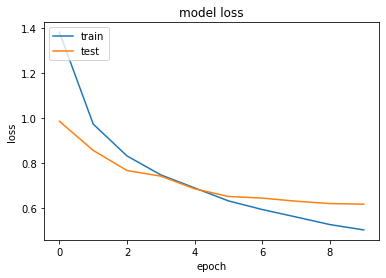

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Y_pred_test = model.predict_proba(X_test_normalized) # Predict probability of image belonging to a class, for each class
Y_pred_test_class = np.argmax(Y_pred_test, axis=1) # Class with highest probability from predicted probabilities
Y_test_class = np.argmax(Y_test_coded, axis=1) # Actual class
Y_pred_test_max_prob = np.max(Y_pred_test, axis=1) # Highest probability

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


In [ ]:
from sklearn.metrics import accuracy_score

print("Test accuracy:", accuracy_score(Y_test_classes, Y_pred_test_classes))

Test accuracy: 0.7896


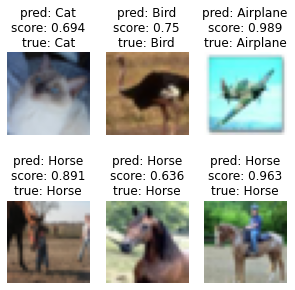

In [ ]:
columns = 3
rows = 2
fig = plt.figure(figsize=(2 * columns - 1, 3 * rows - 1))
for i in range(columns):
    for j in range(rows):
        random_index = np.random.randint(0, len(Y_test))
        ax = fig.add_subplot(rows, columns, i * rows + j + 1)
        ax.grid(b=False)
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label = CIFAR10_CLASSES[Y_pred_test_class[random_index]]
        pred_proba = Y_pred_test_max_prob[random_index]
        true_label = CIFAR10_CLASSES[Y_test[random_index][0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()